<a href="https://colab.research.google.com/github/DileepaLakshan/Face_Mask_Detection-CNN-/blob/main/Face_Mask_Detection_using_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


###Importing Face Mask Dataset


In [ ]:
#API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

 05-12-21-happy-people.jpg   drive		    'images (1).jpeg'   images.jpeg
 data			     face-mask-dataset.zip  'images (2).jpeg'   sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1223.jpg', 'with_mask_1128.jpg', 'with_mask_1809.jpg', 'with_mask_2341.jpg', 'with_mask_776.jpg']
['with_mask_83.jpg', 'with_mask_1282.jpg', 'with_mask_445.jpg', 'with_mask_896.jpg', 'with_mask_1474.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1197.jpg', 'without_mask_3101.jpg', 'without_mask_3757.jpg', 'without_mask_3328.jpg', 'without_mask_2313.jpg']
['without_mask_2348.jpg', 'without_mask_2117.jpg', 'without_mask_2301.jpg', 'without_mask_2044.jpg', 'without_mask_2268.jpg']


In [ ]:
print('Number of images with mask:',len(with_mask_files))
print('Number of images without mask:',len(without_mask_files))

Number of images with mask: 3725
Number of images without mask: 3828


###Creating Labels for the two class of Images

with mask--> 1

without mask--> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

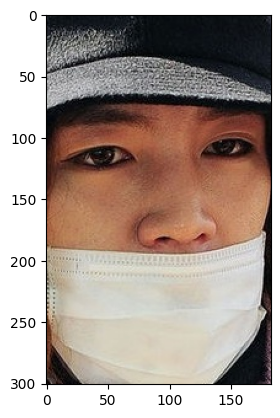

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_531.jpg')
imgplot = plt.imshow(img)
plt.show()

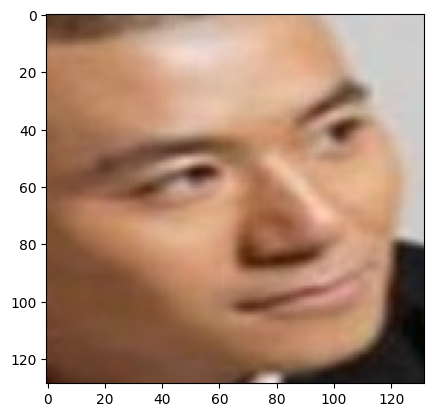

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_13.jpg')
imgplot = plt.imshow(img)
plt.show()

###Image Processing

1. Resize the Images
2. Convert the Images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# convert images to numpy arrays+

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[18, 13, 10],
        [20, 15, 12],
        [22, 17, 14],
        ...,
        [18, 17, 15],
        [16, 15, 13],
        [16, 15, 13]],

       [[18, 13, 10],
        [19, 14, 11],
        [21, 16, 13],
        ...,
        [15, 14, 12],
        [15, 14, 12],
        [15, 14, 12]],

       [[18, 13, 10],
        [18, 13, 10],
        [18, 13, 10],
        ...,
        [13, 12, 10],
        [13, 12, 10],
        [15, 14, 12]],

       ...,

       [[31, 24, 31],
        [31, 24, 30],
        [31, 26, 29],
        ...,
        [11, 11, 11],
        [ 6,  7,  7],
        [ 3,  3,  3]],

       [[31, 24, 30],
        [32, 25, 30],
        [31, 26, 28],
        ...,
        [15, 15, 15],
        [11, 11, 11],
        [ 8,  8,  8]],

       [[31, 25, 29],
        [32, 26, 29],
        [30, 25, 26],
        ...,
        [19, 19, 19],
        [14, 14, 14],
        [11, 11, 11]]], dtype=uint8)
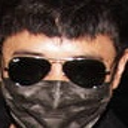

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


###Train Test Split

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

x_train_scaled = X_train/255

x_test_scaled = X_test/255

array([[[ 62,  40,  42],
        [ 57,  35,  37],
        [ 57,  35,  35],
        ...,
        [ 67,  47,  46],
        [ 69,  49,  48],
        [ 78,  58,  57]],

       [[ 61,  39,  41],
        [ 57,  35,  37],
        [ 56,  35,  35],
        ...,
        [ 64,  44,  43],
        [ 66,  46,  45],
        [ 82,  62,  61]],

       [[ 61,  39,  41],
        [ 57,  35,  37],
        [ 56,  35,  35],
        ...,
        [ 63,  43,  42],
        [ 63,  43,  42],
        [ 80,  60,  59]],

       ...,

       [[247, 247, 248],
        [255, 255, 255],
        [252, 252, 253],
        ...,
        [225, 234, 226],
        [204, 218, 208],
        [210, 226, 216]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [224, 233, 225],
        [208, 222, 212],
        [207, 223, 213]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 254, 255],
        ...,
        [226, 236, 227],
        [216, 230, 220],
        [212, 228, 218]]], dtype=uint8)
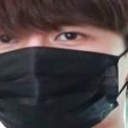

In [ ]:
X_train[0]

In [ ]:
x_train_scaled[0]

array([[[0.24313725, 0.15686275, 0.16470588],
        [0.22352941, 0.1372549 , 0.14509804],
        [0.22352941, 0.1372549 , 0.1372549 ],
        ...,
        [0.2627451 , 0.18431373, 0.18039216],
        [0.27058824, 0.19215686, 0.18823529],
        [0.30588235, 0.22745098, 0.22352941]],

       [[0.23921569, 0.15294118, 0.16078431],
        [0.22352941, 0.1372549 , 0.14509804],
        [0.21960784, 0.1372549 , 0.1372549 ],
        ...,
        [0.25098039, 0.17254902, 0.16862745],
        [0.25882353, 0.18039216, 0.17647059],
        [0.32156863, 0.24313725, 0.23921569]],

       [[0.23921569, 0.15294118, 0.16078431],
        [0.22352941, 0.1372549 , 0.14509804],
        [0.21960784, 0.1372549 , 0.1372549 ],
        ...,
        [0.24705882, 0.16862745, 0.16470588],
        [0.24705882, 0.16862745, 0.16470588],
        [0.31372549, 0.23529412, 0.23137255]],

       ...,

       [[0.96862745, 0.96862745, 0.97254902],
        [1.        , 1.        , 1.        ],
        [0.98823529, 0

### Building a Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(x_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - acc: 0.6928 - loss: 0.6573 - val_acc: 0.8678 - val_loss: 0.2949
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8565 - loss: 0.3334 - val_acc: 0.8860 - val_loss: 0.2721
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.8782 - loss: 0.2819 - val_acc: 0.9074 - val_loss: 0.2338
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9233 - loss: 0.2063 - val_acc: 0.9207 - val_loss: 0.2235
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9289 - loss: 0.1792 - val_acc: 0.9190 - val_loss: 0.2069


### Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled,Y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9376 - loss: 0.1851
Test Accuracy = 0.9278623461723328


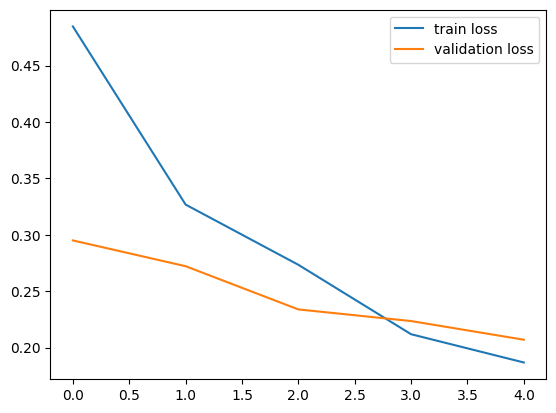

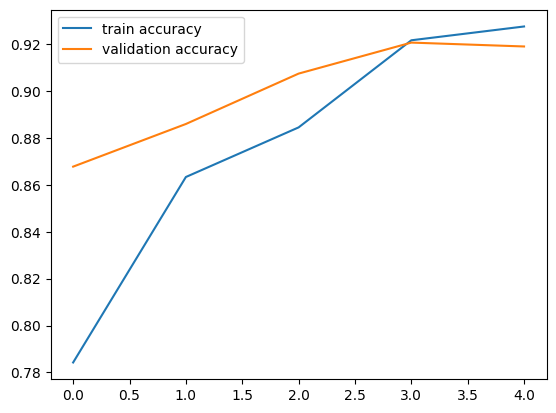

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

# plot the accuracay value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

### Predictive System

Enter the path of the input image:/content/images (3).jpeg


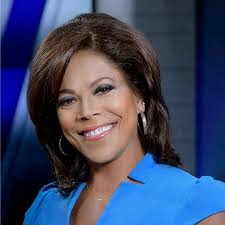

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.68967247 0.18599856]]
0
The person in the image is not wearing a mask


In [ ]:
import numpy as np
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow  # If using Google Colab

input_image_path = input('Enter the path of the input image:')

# Open the image using PIL
input_image = Image.open(input_image_path)

# Convert PIL image to a NumPy array (OpenCV format)
input_image_cv = np.array(input_image)

# Convert RGB to BGR (OpenCV uses BGR format)
input_image_cv = cv2.cvtColor(input_image_cv, cv2.COLOR_RGB2BGR)

# Display the image
cv2_imshow(input_image_cv)

# Resize the image to (128,128)
input_image_resize = input_image.resize((128, 128))

# Convert to NumPy array and normalize
input_image_array = np.array(input_image_resize) / 255.0

# Reshape for model input
input_image_reshaped = np.reshape(input_image_array, [1, 128, 128, 3])

# Predict using the model
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

# Get the predicted class
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')
